In [1]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [2]:
# get paths to all scoring .csv files
scoring_file_paths = glob('./results/scoring_*.csv')
print(scoring_file_paths)

['./results\\scoring_JJ.csv', './results\\scoring_Marc.csv', './results\\scoring_simon.csv']


In [3]:
# load all .csv scoring files into a single DataFrame
scoring_files = []
for file_path in scoring_file_paths:
    scoring_files.append(pd.read_csv(file_path))
df_scores = pd.concat(scoring_files, axis=0, ignore_index=True)

In [4]:
# Create a new DataFrame of mean and std of scores
mean_scores = df_scores.apply(lambda col: [col.mean(), col.std()])
mean_scores.index = ['mean', 'std']
mean_scores.head()

,cidx_2,recon_mean_2,mean_0,cidx_4,mean_5,recon_mean_6,mean_3,mean_2,cidx_0,cidx_6,...,mean_1,mean_4,recon_mean_5,recon_mean_4,cidx_3,recon_mean_1,cidx_1,recon_mean_3,cidx_5,recon_mean_0
mean,3.333333,3.300000,4.500000,1.600000,1.200000,1.133333,2.633333,3.433333,4.300000,1.100000,...,4.166667,1.366667,1.300000,1.733333,2.433333,4.000000,3.966667,2.533333,1.166667,4.566667
std,0.606478,0.534983,0.508548,0.621455,0.406838,0.434172,0.556053,0.678911,0.595963,0.305129,...,0.530669,0.490133,0.466092,0.639684,0.568321,0.787839,0.614948,0.628810,0.379049,0.504007


In [10]:
# define some variables for plot formatting
model_map = {
    "cidx": ['r', -0.28], 
    "recon_mean": ['g', 0], 
    "mean": ['b', 0.28]
}
model_names = [
    "Reaction Time Based Model", 
    "Mean Image Model", 
    "Reconstructed Mean Image Model"
]

In [16]:
# get barplots over the continuum for all three methods
f, ax = plt.subplots(1, 7, figsize=(14, 3), sharey=True)
for colname in df_scores:
    idx = 6 - int(colname.split('_')[-1])
    color, xd = model_map[colname[:-2]]

    scores, counts = np.unique(df_scores[colname].values, return_counts=True)
    counts = counts / np.sum(counts)

    ax[idx].bar(scores + xd, counts, width=0.28, color=color)

# formatting
for i in range(7):
    ax[i].set_title(f'Smile strength {i}')
    ax[i].set_xticks([1, 2, 3, 4, 5])
ax[0].set_ylabel('Frequency')
ax[3].set_xlabel('Participant scoring')
ax[3].legend(
    model_names, 
    loc='upper center', 
    bbox_to_anchor=(0.5, -0.2),
    fancybox=True, 
    shadow=True, 
    ncol=5
)
plt.savefig('./results/continua_eval_bar.png', bbox_inches='tight')
plt.show()

In [13]:
def get_cols(df, starts_with):
    return df[df.columns[pd.Series(df.columns).str.startswith(starts_with)]]

# Get DataFrames of mean and std for the 3 different methods 
df_cidx = get_cols(mean_scores, 'cidx')
df_recon = get_cols(mean_scores, 'recon')
df_mean = get_cols(mean_scores, 'mean')

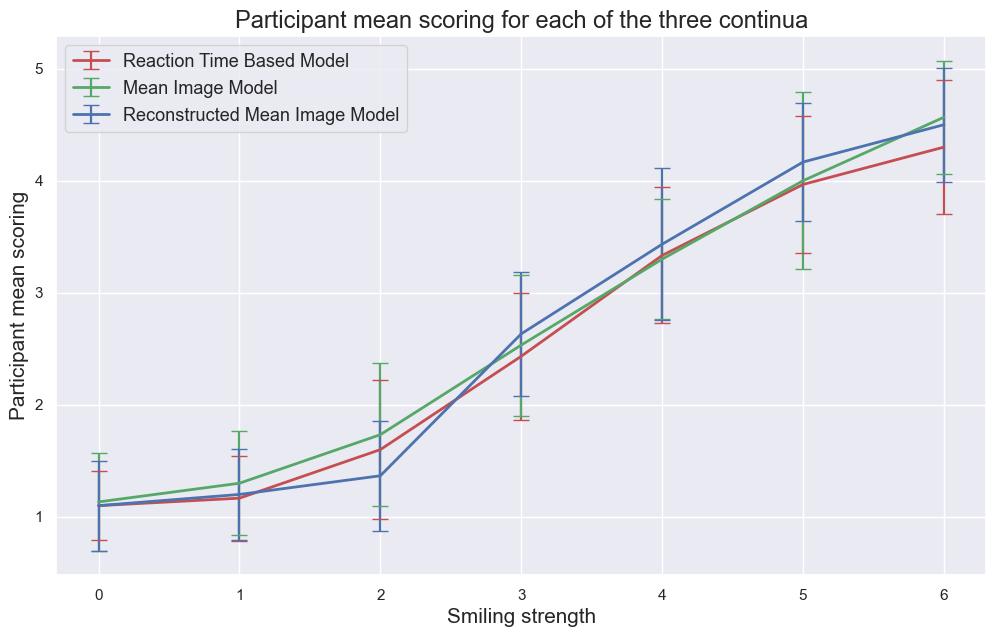

In [14]:
# display error bar plot of the individual methods
plt.figure(figsize=(12, 7))
xs = np.arange(6, -1, -1)
colors = ['r', 'g', 'b']
for idx, df in enumerate([df_cidx, df_recon, df_mean]):
    # get mean and std
    ys = df.loc['mean'].sort_index().values
    stds = df.loc['std'].sort_index().values

    # display error bar plot
    plt.errorbar(xs, ys, yerr=stds, linewidth=2, elinewidth=1.6, capsize=6, color=colors[idx], label=model_names[idx])
plt.ylabel('Participant mean scoring', fontsize=15)
plt.xlabel('Smiling strength', fontsize=15)
plt.title('Participant mean scoring for each of the three continua', fontsize=17)
plt.legend(fontsize=13)
plt.savefig('./results/continua_eval_err.png', bbox_inches='tight')
plt.show()